## Wave Interference

Suppose we drop a pebble in a pond and waves radiate out from the spot where it fell. We could create a simple representation of the physics with a sine wave, spreading out in a uniform circle, to represent the height of the waves at some later time.

If the center of the circle is at $x_1, y_1$ then the distance $r_1$ to the center from a point is:

> $ r_1 = \sqrt{(x-x_1)^2 + (y-y_1)^2} $

and the sine wave for the height is

> $ \xi_1 (x,y) = \xi_0 sin(kr_1)$

where $\xi_0$ is the amplitude of the waves and $k$ is the wavevector, related to the wavelength $\lambda$ by $k=2\pi / \lambda$.

Now suppose we drop another pebble in the pond, creating another circular set of waves with the same wavelength and amplitude but centered on a different point $x_2, y_2$:

> $\xi_2(x,y) = \xi_0 sink(kr_2) $ 

> with  $ r_2 = \sqrt{(x-x_2)^2 + (y-y_2)^2} $

Then, assuming the waves add linearly (which is a reasonable assumption for water waves, provided they are not too big), the total height of the surface at point $x,y$ is:

> $ \xi(x, y) = \xi_0sin(kr_1) + \xi_0 sin(kr_2)$

Suppose the wavelength of the waves is $\lambda$, the amplitude is $A$, and the distance between the center of the circles is $d$. 

Write a program that will calculate the height of the waves over a square region of length $h$.

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
np.set_printoptions(threshold=np.inf)
#late night ventures, don't try to understand it
def height (wave, xi, x_1, y_1, d, h):
    r1 = [[]]
    for i in range (h):
        tempArr = []
        for j in range (h):
            tempArr.insert(j,math.sqrt((i - x_1)**2 + (j - y_1)**2),)
        r1.insert(i,tempArr)
    del r1[h]
    r2 = [[0]]
    for i in range (h):
        tempArr = []
        for j in range (h):
            tempArr.insert(j,math.sqrt((i - x_1)**2 + (j - y_1-d)**2),)
        r2.insert(i,tempArr)
    del r2[h]
    k = 2*math.pi/wave
    amp = [[]]
    for i in range (h):
        tempArr = []
        for j in range (h):
            tempArr.insert(j,xi*math.sin(k*r1[i][j])+xi*math.sin(k*r2[i][j]))
        amp.insert(i, tempArr)
    del amp[h]
    
    return amp

In [8]:
# Hint: Look into np.meshgrid(...)

Plot this function using $\lambda = 5.0$ cm, $\xi_0 = 1$ cm, $x_1$ = 0, $d = 20$ cm and $h=1$ m.

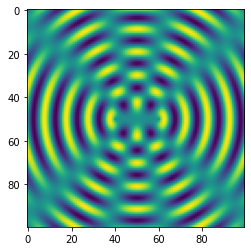

In [9]:
# Hint: Look into plt.imshow(...)
#constructs and shows the plot of amplitude for wave interference
plt.imshow(height(10,1,50,40,20,100))
plt.show()

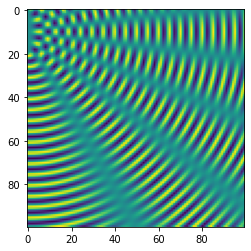

In [10]:
def amp (x,y,wave,xi, d, h):
    '''This function with take an x position, y position, the amplitude,
    distance between two centers, and dimentions for the plot constructed
    x and y can also be be a meshgrid
    Returns: the height of the wave at at the given x and y cordinates, or a matrix if x and y are meshgrids'''
    #finds the radius of the first wave at the given locations
    r1 = np.sqrt((x)**2 + (y)**2)
    #finds the radius of the second wave at the given locations
    r2 = np.sqrt((x)**2 + (y-d)**2)
    #calculates k from given variables to be used in later equations
    k =  2*np.pi/wave
    #calculates the height of the wave at a given point
    amplitude = xi*np.sin(k*r1)+xi*np.sin(k*r2)
    return amplitude
def height (wave, xi, d, h):
    #creates an array that contains values for 0 - 100
    x = np.linspace(0,h,h)
    #creats another array that contains values for 0 - 100
    y = np.linspace(0,h,h)
    #creates a meshgrid for the given x and y arrays
    xx, yy = np.meshgrid(x, y)
    #returns a double array that contains the height of each of the values in the meshgrid
    arr = amp (xx, yy, wave, xi, d, h)
    return arr
#plots the interference patern
plt.imshow (height (5,1, 20,100 ))